In [38]:
from newsapi import NewsApiClient
import pandas as pd
import time
newsapi = NewsApiClient(api_key='f8c75c18656149309e660ee3682ae166')
#keys=f8c75c18656149309e660ee3682ae166,9691f05cd1bf40b9affb85d8bf0a98db,7dacecf955174607b1ffb79fcad52619

In [21]:
company_list=['modi','trump','pakistan','china','india','pink floyd','eminem','BJP','covid19','korea','cm yogi','lockdown','putin','usa','iit','lucknow']
newstitle=[]

In [89]:
n=16
for i in range(n):
    DATE="2020-04-"+str(int(15+(i+1)))
    #print(DATE)
    all_articles = newsapi.get_everything(q='lucknow',
                                          from_param=DATE,
                                          to=DATE,
                                          language='en',
                                          sort_by='relevancy')
    if(len(all_articles)):
        for j in range(len(all_articles)):
            newstitle.append(str(all_articles.get('articles')[j].get('title')))
            newstitle.append(str(all_articles.get('articles')[j].get('description')))
print(len(newstitle))
newstitle.to_excel('trainingUntagged.xlsx')

1538


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
def text_searcher(text,keys):
    result=""
    sents=str(text).split(". ")
    for key in keys:
        for sent in sents:
            if key.lower() in sent.lower():
                #print(sent," key: ",key)
                result=result+"***"+str(sent)
    return result

In [ ]:
jpmc='data\JPMorgan Chase\JPMorgan Chase_news_{0}.xlsx'.format(DATE)
abbott='data\Abbott Laboratories\Abbott Laboratories_news_{}.xlsx'.format(DATE)
amzn='data\Amazon\Amazon_news_{0}.xlsx'.format(DATE)
barclays='data\Barclays\Barclays_news_{0}.xlsx'.format(DATE)
google='data\Google\Google_news_{0}.xlsx'.format(DATE)
hsbc='data\HSBC\HSBC_news_{0}.xlsx'.format(DATE)
jnj='data/Johnson & Johnson Company/Johnson & Johnson Company/Johnson & Johnson Company_news_{0}.xlsx'
dates=[]
articles=[]

In [3]:
stocks=pd.read_excel('master_data/stockprices/AMZN.xlsx')
dataWeb=pd.read_excel('master_data/amazon_master.xlsx')

In [9]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DeltaIntraday,DeltaInterday,DeltaHighlow,BooleanUPIntraday,BooleanDOWNIntraday,BooleanUPInterday,BooleanDOWNInterday,BooleanNONEInterday,BooleanNONEIntraday
0,2019-12-16,1767.000000,1769.500000,1757.050049,1769.209961,1769.209961,3145200,2.209961,0.000000,12.449951,1,0,0,0,1,0
1,2019-12-17,1778.010010,1792.000000,1777.390015,1790.660034,1790.660034,3644400,12.650024,-8.800049,14.609985,1,0,0,1,0,0
2,2019-12-18,1795.020020,1798.199951,1782.359985,1784.030029,1784.030029,3351400,-10.989991,-4.359986,15.839966,0,1,0,1,0,0
3,2019-12-19,1780.500000,1792.989990,1774.060059,1792.280029,1792.280029,2652800,11.780029,3.530029,18.929931,1,0,1,0,0,0
4,2019-12-20,1799.619995,1802.969971,1782.449951,1786.500000,1786.500000,5150800,-13.119995,-7.339966,20.520020,0,1,0,1,0,0


In [16]:
def searcher(D1):
    for i in range(len(stocks)):
        D2=stocks['Date'][i]
        if(D1==D2):
            return([stocks['DeltaIntraday'][i],stocks['DeltaInterday'][i],stocks['DeltaHighlow'][i],stocks['BooleanUPIntraday'][i],stocks['BooleanDOWNIntraday'][i],stocks['BooleanUPInterday'][i],stocks['BooleanDOWNInterday'][i],D2])
    
    return([])

In [19]:
date=[]
newsA=[]
interday=[]
intraday=[]
highlow=[]
upintraday=[]
downintraday=[]
upinterday=[]
downinterday=[]
date=[]
for i in range(len(dataWeb)):
    D1=datetime.strptime(dataWeb['date'][i],"%Y-%m-%d")
    r=searcher(D1)
    a=str(dataWeb['articles'][i])
    if(len(r)!=0):
        intraday.append(r[0])
        interday.append(r[1])
        highlow.append(r[2])
        upintraday.append(r[3])
        downintraday.append(r[4])
        upinterday.append(r[5])
        downinterday.append(r[6])
        date.append(r[7])
        newsA.append(a)
lobhai=pd.DataFrame()
lobhai['date']=date
lobhai['article']=newsA
lobhai['interday']=interday
lobhai['intraday']=intraday
lobhai['highlow']=highlow
lobhai['upintraday']=upintraday
lobhai['downintraday']=downintraday
lobhai['upinterday']=upinterday
lobhai['downinterday']=downinterday

In [23]:
art=[]
for a in lobhai['article']:
    art.append(str(a))

In [25]:
from monkeylearn import MonkeyLearn
ml = MonkeyLearn('2c820bf34bfdc27fe6eb9b5bb45e804f92fa23cb')
model_id = 'cl_pi3C7JiL'
result = ml.classifiers.classify(model_id, art)

In [61]:
#print(result.body[0].get('classifications')[0].get('tag_name'),result.body[0].get('classifications')[0].get('confidence'))
r=ml.classifiers.classify(model_id, d)

In [27]:
rev=[]
sent=[]
conf=[]
score=[]
for x in result.body:
    rev.append(str(x.get('text')))
    sent.append(str(x.get('classifications')[0].get('tag_name')))
    conf.append(float(x.get('classifications')[0].get('confidence')))
    if(str(x.get('classifications')[0].get('tag_name'))=="Negative"):
        score.append(float(-1*x.get('classifications')[0].get('confidence')))
    elif(str(x.get('classifications')[0].get('tag_name'))=="Positive"):
        score.append(float(1*x.get('classifications')[0].get('confidence')))
    else:
        score.append(float(0.0))

In [70]:
sentiDat=pd.DataFrame()
sentiDat['news']=rev
sentiDat['sentiment']=sent
sentiDat['confidence']=conf
sentiDat['score']=score

In [28]:
lobhai['sentiment']=sent
lobhai['confidence']=conf
lobhai['score']=score

,date,article,interday,intraday,highlow,upintraday,downintraday,upinterday,downinterday,sentiment,confidence,score
0,2020-02-03,***Most of Amazon's Echo devices are on sale ...,-1.880005,-6.400025,48.250000,0,1,0,1,Positive,0.832,0.832
1,2020-02-04,***Amazon is helping brands build custom text...,-25.680054,19.789917,44.430054,1,0,0,1,Negative,0.542,-0.542
2,2020-02-05,***Deliverr doesn’t own a warehouse or a deli...,-21.350098,-31.150025,39.020020,0,1,0,1,Neutral,0.411,0.000
3,2020-02-06,***TL;DR: The Fire TV Cube is on sale for £89...,-1.150025,9.209960,31.500000,1,0,0,1,Positive,0.660,0.660
4,2020-02-07,"***Google, Amazon, and Apple Have a Trillion ...",8.239990,37.290039,60.430053,1,0,1,0,Positive,0.862,0.862
5,2020-02-10,***Amazon wants to question Trump over his ro...,-5.729981,48.899902,50.640137,1,0,0,1,Negative,0.977,-0.977
6,2020-02-11,***Amazon Exec Jay Carney Cites Sanders Prais...,-16.989990,-0.099853,49.949951,0,1,0,1,Negative,0.507,-0.507
7,2020-02-12,***Amazon is undercutting Facebook's own Port...,-12.399902,-3.199951,24.959961,0,1,0,1,Neutral,0.560,0.000
8,2020-02-13,***The motion was granted as part of a suit A...,15.010010,4.880127,28.280029,1,0,1,0,Negative,0.857,-0.857
9,2020-02-14,***Get 3 months of Amazon Music Unlimited for...,-5.809815,-20.809815,33.150146,0,1,0,1,Positive,0.949,0.949


In [36]:
lobhai.head()

,date,article,interday,intraday,highlow,upintraday,downintraday,upinterday,downinterday,sentiment,confidence,score
0,2020-02-03,***Most of Amazon's Echo devices are on sale ...,-1.880005,-6.400025,48.250000,0,1,0,1,Positive,0.832,0.832
1,2020-02-04,***Amazon is helping brands build custom text...,-25.680054,19.789917,44.430054,1,0,0,1,Negative,0.542,-0.542
2,2020-02-05,***Deliverr doesn’t own a warehouse or a deli...,-21.350098,-31.150025,39.020020,0,1,0,1,Neutral,0.411,0.000
3,2020-02-06,***TL;DR: The Fire TV Cube is on sale for £89...,-1.150025,9.209960,31.500000,1,0,0,1,Positive,0.660,0.660
4,2020-02-07,"***Google, Amazon, and Apple Have a Trillion ...",8.239990,37.290039,60.430053,1,0,1,0,Positive,0.862,0.862


In [75]:
sentiDat.to_excel('trainingDat.xlsx')

In [8]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
prices=pd.read_excel('master_data\stockprices\ABT.xlsx')

In [38]:
Y=[]
uD=[]
for i in range(len(lobhai)):
    s=lobhai['sentiment'][i]
    upintra=lobhai['upintraday'][i]
    downintra=lobhai['downintraday'][i]
    if(s=="Positive"):
        Y.append(1)
    elif(s=="Negative"):
        Y.append(-1)
    else:
        Y.append(0)
    if(upintra==1 and downintra==0):
        uD.append(1)
    elif(upintra==0 and downintra==1):
        uD.append(-1)
    else:
        uD.append(0)

In [41]:
lobhai.head()

,date,article,interday,intraday,highlow,upintraday,downintraday,upinterday,downinterday,sentiment,confidence,score
0,2020-02-03,***Most of Amazon's Echo devices are on sale ...,-1.880005,-6.400025,48.250000,0,1,0,1,Positive,0.832,0.832
1,2020-02-04,***Amazon is helping brands build custom text...,-25.680054,19.789917,44.430054,1,0,0,1,Negative,0.542,-0.542
2,2020-02-05,***Deliverr doesn’t own a warehouse or a deli...,-21.350098,-31.150025,39.020020,0,1,0,1,Neutral,0.411,0.000
3,2020-02-06,***TL;DR: The Fire TV Cube is on sale for £89...,-1.150025,9.209960,31.500000,1,0,0,1,Positive,0.660,0.660
4,2020-02-07,"***Google, Amazon, and Apple Have a Trillion ...",8.239990,37.290039,60.430053,1,0,1,0,Positive,0.862,0.862


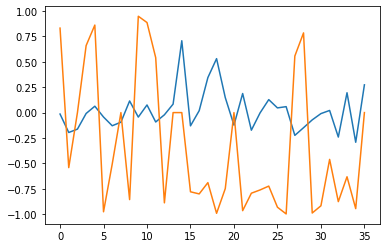

In [51]:
#plt.plot(prices.Date,prices.DeltaIntraday)
plt.plot(lobhai['interday']/((max(lobhai['interday'])-min(lobhai['interday']))))
plt.plot(lobhai['score'])

In [91]:
news=pd.read_excel('master_data/abbott_master.xlsx')

In [34]:
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DeltaIntraday,DeltaInterday,DeltaHighlow,BooleanUPIntraday,BooleanDOWNIntraday,BooleanUPInterday,BooleanDOWNInterday,BooleanNONEInterday,BooleanNONEIntraday
0,2019-12-16,86.949997,87.099998,86.300003,86.400002,85.673820,3843700,-0.549995,0.000000,0.799995,0,1,0,0,1,0
1,2019-12-17,86.580002,87.300003,86.000000,87.059998,86.328262,5368500,0.479996,0.180000,1.300003,1,0,1,0,0,0
2,2019-12-18,87.080002,87.269997,86.610001,86.930000,86.199356,5831100,-0.150002,0.020004,0.659996,0,1,1,0,0,0
3,2019-12-19,86.739998,87.349998,86.489998,87.349998,86.615829,4643700,0.610000,-0.190002,0.860000,1,0,0,1,0,0
4,2019-12-20,88.989998,89.239998,86.629997,86.660004,85.931633,11606500,-2.329994,1.640000,2.610001,0,1,1,0,0,0


In [92]:
def searcher(D1):
    global prices
    for i in range(len(prices)):
        #D2=datetime.strptime(prices['Date'][i],"%Y-%m-%d")
        D2=prices['Date'][i]
        if(D2==D1):
            return([prices['DeltaIntraday'][i],prices['DeltaInterday'][i],prices['DeltaHighlow'][i],prices['BooleanUPIntraday'][i],prices['BooleanDOWNIntraday'][i],prices['BooleanUPInterday'][i],prices['BooleanDOWNInterday'][i]])
    return []

In [94]:
print(datetime.now())
headl=[]
intraday=[]
interday=[]
upintraday=[]
downintraday=[]
upinterday=[]
downinterday=[]
highlow=[]
date=[]
for z in range(len(news)):
    d1=news['date'][z]
    art=str(news['articles'][z])
    D1=datetime.strptime(d1,"%Y-%m-%d")
    r=searcher(D1)
    if(len(r)!=0):
        intra=r[0]
        inter=r[1]
        hl=r[2]
        upintra=r[3]
        downintra=r[4]
        upinter=r[5]
        downinter=r[6]
    if(intra and hl):
        headl.append(art)
        intraday.append(intra)
        interday.append(inter)
        highlow.append(hl)
        upintraday.append(upintra)
        downintraday.append(downintra)
        upinterday.append(upinter)
        downinterday.append(downinter)
        date.append(D1)
print(datetime.now())
lobhai=pd.DataFrame()
lobhai['date']=date
lobhai['news']=headl
lobhai['intraday']=intraday
lobhai['interday']=interday
lobhai['upintraday']=upintraday
lobhai['downintraday']=downintraday
lobhai['highlow']=highlow
lobhai['upinterday']=upinterday
lobhai['downinterday']=downinterday
lobhai

2020-05-15 21:26:54.722222
2020-05-15 21:26:54.820960


,date,news,intraday,interday,upintraday,downintraday,highlow,upinterday,downinterday
0,2020-02-03,***Why Abbott Laboratories Just Became an Eve...,-0.720001,0.640000,0,1,1.650002,1,0
1,2020-02-04,***Abbott's Implantable Heart Pump System Get...,0.080001,1.090004,1,0,1.099998,1,0
2,2020-02-05,***2020 Japan Hospital Clinical Chemistry and...,0.689995,0.640000,1,0,1.059998,1,0
3,2020-02-07,***Worldwide Markets for Deep Brain Stimulato...,-1.360000,-0.239998,0,1,1.830002,0,1
4,2020-02-10,***NEW DELHI: Around 51 stocks rose to touch ...,1.090004,-0.660004,1,0,1.090004,0,1
5,2020-02-11,***United States Neurology Devices Market Out...,0.529999,0.339996,1,0,0.880005,1,0
6,2020-02-13,***Better Buy: Abbott Laboratories vs***Bette...,0.180000,-0.290001,1,0,1.340004,0,1
7,2020-02-17,***Should You Think About Buying Abbott Labor...,0.180000,-0.290001,1,0,1.340004,0,1
8,2020-02-18,***New Abbott ICD and CRT-D devices CE Mark'd...,-0.540001,-0.240006,0,1,1.180000,0,1
9,2020-02-19,***Abbott Laboratories: Why Adding More of Th...,0.529999,-0.049995,1,0,1.239998,0,1


In [63]:
cp=0
SENTS=[]
for N in lobhai['news']:
    sent1=""
    cp=cp+len(N.split("***"))
    sents=N.split("***")
    for s in sents:
        if(s!=" " and len(s)>2):
            sent1=sent1+" "+str(s)
    (SENTS.append(sent1))
print(SENTS)
#8bc5aa9fe46a957f5a746dfc8747b1f802449bc7,375e592c67c5bb9ebbbf38d316540c5b673a263b

[' Why Abbott Laboratories Just Became an Even Better Buy Why Abbott Laboratories Just Became an Even Better Buy  Abbott Laboratories\xa0(NYSE:ABT) has been a great buy for many years Abbott Laboratories\xa0(NYSE:ABT) has been a great buy for many years  Spain Cancer Diagnostics Market, 2020 - Abbott, Beckman Coulter, Exact Sciences, Guided Therapeutics & Vermillion - ResearchAndMarkets.com  UK Cancer Diagnostics Market, 2020 - Abbott, Beckton Dickinson, Guided Therapeutics, Roche & Wako Pure Chemicals - ResearchAndMarkets.com', " Abbott's Implantable Heart Pump System Gets FDA's Breakthrough Device Designation  Abbott Laboratories (NYSE:ABT) announced on Tuesday its in-development implantable heart pump system received the Breakthrough Device designation from the U.S Abbott Laboratories (NYSE:ABT) announced on Tuesday its in-development implantable heart pump system received the Breakthrough Device designation from the U.S  2020 Italy Cancer Diagnostics Market - Abbott, Becton Dickins

39

In [64]:
from monkeylearn import MonkeyLearn
ml = MonkeyLearn('8bc5aa9fe46a957f5a746dfc8747b1f802449bc7')
model_id = 'cl_pi3C7JiL'
result = ml.classifiers.classify(model_id, SENTS)
rev=[]
sent=[]
conf=[]
score=[]
for x in result.body:
    rev.append(str(x.get('text')))
    sent.append(str(x.get('classifications')[0].get('tag_name')))
    conf.append(float(x.get('classifications')[0].get('confidence')))
    if(str(x.get('classifications')[0].get('tag_name'))=="Negative"):
        score.append(float(-1*x.get('classifications')[0].get('confidence')))
    elif(str(x.get('classifications')[0].get('tag_name'))=="Positive"):
        score.append(float(1*x.get('classifications')[0].get('confidence')))
    else:
        score.append(float(0.0))

In [95]:
lobhai['sentiment']=sent
lobhai['confidence']=conf
lobhai['score']=score

,date,news,intraday,interday,upintraday,downintraday,highlow,upinterday,downinterday,sentiment,confidence,score
0,2020-02-03,***Why Abbott Laboratories Just Became an Eve...,-0.720001,0.640000,0,1,1.650002,1,0,Positive,0.509,0.509
1,2020-02-04,***Abbott's Implantable Heart Pump System Get...,0.080001,1.090004,1,0,1.099998,1,0,Neutral,0.862,0.000
2,2020-02-05,***2020 Japan Hospital Clinical Chemistry and...,0.689995,0.640000,1,0,1.059998,1,0,Neutral,0.965,0.000
3,2020-02-07,***Worldwide Markets for Deep Brain Stimulato...,-1.360000,-0.239998,0,1,1.830002,0,1,Neutral,0.681,0.000
4,2020-02-10,***NEW DELHI: Around 51 stocks rose to touch ...,1.090004,-0.660004,1,0,1.090004,0,1,Neutral,0.704,0.000


In [81]:
y=[]
for x in lobhai['sentiment']:
    if(x=="Positive"):
        y.append(1)
    elif(x=="Negative"):
        y.append(-1)
    else:
        y.append(0)

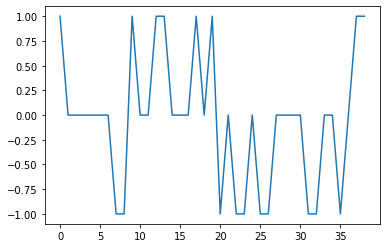

In [82]:
plt.plot(y)

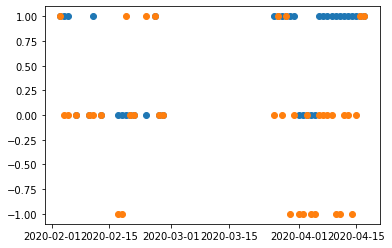

In [111]:
plt.plot_date(x=lobhai['date'],y=lobhai['upinterday'])
plt.plot_date(x=lobhai['date'],y=y)

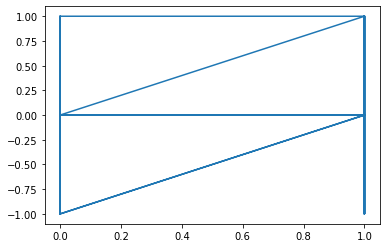

In [107]:
plt.plot(lobhai['upinterday'],y)

In [ ]:
lobhai